In [12]:
#imports
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
plt.style.use('fivethirtyeight')
from dotenv import load_dotenv
import cloudinary
import cloudinary.uploader
import cloudinary.api
import json
load_dotenv()
from flask import Flask
from flask_pymongo import PyMongo


Python-dotenv could not parse statement starting at line 2
Python-dotenv could not parse statement starting at line 3


In [14]:
app = Flask(__name__)

In [3]:
CLOUDNAME = "dx5p0mifp"
CLOUDAPIKEY = 856597761945973
COULDINARYSECRET = "DhZ_9S-5mH3XPo7vBRBITSbI8Po"

In [4]:
img = image.imread("../Resources/Animals-10/butterfly/butterfly.jpeg")

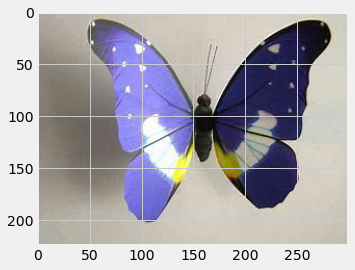

In [5]:
plt.imshow(img)

In [6]:
config = cloudinary.config(secure=True,api_key = 856597761945973, cloud_name = "dx5p0mifp")

In [7]:
CLOUDINARY_URL=cloudinary://<api_key>:<api_secret>@<cloud_name>

SyntaxError: invalid syntax (4023881067.py, line 1)

In [8]:
config = cloudinary.config(secure=True, api_key= 856597761945973, api_secret = "DhZ_9S-5mH3XPo7vBRBITSbI8Po")

In [9]:
cloudinary.uploader.upload("../Resources/Animals-10/butterfly/butterfly.jpeg", public_id="Mongo_Test", unique_filename=True, transformation=[
  {'height': 32, 'width' : 32, 'crop': "scale"}
  ])

{'asset_id': '15617ce5c4a00f04523aaef543c17825',
 'public_id': 'Mongo_Test',
 'version': 1668687405,
 'version_id': '0cc9f9827b4f639030bba1baaff79a40',
 'signature': 'a10c5779e62e418c56b7d9914e165d8c1df7ff91',
 'width': 32,
 'height': 32,
 'format': 'jpg',
 'resource_type': 'image',
 'created_at': '2022-11-17T12:16:45Z',
 'tags': [],
 'bytes': 663,
 'type': 'upload',
 'etag': '818af2caf609c2e3f8c8fee2bbf0438c',
 'placeholder': False,
 'url': 'http://res.cloudinary.com/dx5p0mifp/image/upload/v1668687405/Mongo_Test.jpg',
 'secure_url': 'https://res.cloudinary.com/dx5p0mifp/image/upload/v1668687405/Mongo_Test.jpg',
 'folder': '',
 'original_filename': 'butterfly',
 'original_extension': 'jpeg',
 'api_key': '856597761945973'}

In [54]:
changeImg = cloudinary.CloudinaryImage("our_butterfly").image(width = 32,height = 32)

In [62]:
changeImg

'<img height="32" src="https://res.cloudinary.com/dx5p0mifp/image/upload/h_32,w_32/our_butterfly" width="32"/>'

In [63]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir("../Resources/Animals-10/butterfly") if isfile(join("../Resources/Animals-10/butterfly", f))]


In [65]:
onlyfiles

['butterfly (1).jpg',
 'butterfly (1).png',
 'butterfly (10).jpeg',
 'butterfly (10).jpg',
 'butterfly (10).png',
 'butterfly (100).jpeg',
 'butterfly (100).jpg',
 'butterfly (1000).jpeg',
 'butterfly (1001).jpeg',
 'butterfly (1002).jpeg',
 'butterfly (1003).jpeg',
 'butterfly (1004).jpeg',
 'butterfly (1005).jpeg',
 'butterfly (1006).jpeg',
 'butterfly (1007).jpeg',
 'butterfly (1008).jpeg',
 'butterfly (1009).jpeg',
 'butterfly (101).jpeg',
 'butterfly (101).jpg',
 'butterfly (1010).jpeg',
 'butterfly (1011).jpeg',
 'butterfly (1012).jpeg',
 'butterfly (1013).jpeg',
 'butterfly (1014).jpeg',
 'butterfly (1015).jpeg',
 'butterfly (1016).jpeg',
 'butterfly (1017).jpeg',
 'butterfly (1018).jpeg',
 'butterfly (1019).jpeg',
 'butterfly (102).jpeg',
 'butterfly (102).jpg',
 'butterfly (1020).jpeg',
 'butterfly (1021).jpeg',
 'butterfly (1022).jpeg',
 'butterfly (1023).jpeg',
 'butterfly (1024).jpeg',
 'butterfly (1025).jpeg',
 'butterfly (1026).jpeg',
 'butterfly (1027).jpeg',
 'butterfly

In [85]:
n =0 
for picture in onlyfiles:
    cloudinary.uploader.upload(f'../Resources/Animals-10/butterfly/{picture}', public_id = f"{picture}+ '_upload' + {n}", unique_filename=True, transformation=[
  {'height': 32, 'width' : 32, 'crop': "scale"}
  ])
    n += 1

In [10]:
image_info=cloudinary.api.resource("Mongo_Test")

In [20]:
image_info

{'asset_id': '15617ce5c4a00f04523aaef543c17825',
 'public_id': 'Mongo_Test',
 'format': 'jpg',
 'version': 1668687405,
 'resource_type': 'image',
 'type': 'upload',
 'created_at': '2022-11-17T12:16:45Z',
 'bytes': 663,
 'width': 32,
 'height': 32,
 'folder': '',
 'url': 'http://res.cloudinary.com/dx5p0mifp/image/upload/v1668687405/Mongo_Test.jpg',
 'secure_url': 'https://res.cloudinary.com/dx5p0mifp/image/upload/v1668687405/Mongo_Test.jpg',
 'next_cursor': 'dcd56bfa258e2323ca5aefd2730f22a536b4b64c43498032b9ec31d5835c5a59',
 'derived': []}

In [15]:
app.config["MONGO_URI"] ="mongodb://localhost:27017/FinalProjectDB"
mongo = PyMongo(app)

In [16]:
pictureTable = mongo.db.pictureData


In [17]:
#drop the table if it exists
#mongo.db.pictureData.drop

In [22]:
image_info['url']

'http://res.cloudinary.com/dx5p0mifp/image/upload/v1668687405/Mongo_Test.jpg'

In [25]:
picture_upload = {
    "asset_id" : image_info['asset_id'],
    "public_id" : image_info['public_id'],
    "created_at": image_info['created_at'],
    "url": image_info["url"]
    
}

In [27]:
pictureTable.insert_one(picture_upload)